# Web Scraping /r/depression's top 100 "All Time" and "Controversial" post titles

In [70]:
# Other libraries
import pandas as pd

# PRAW libraries
import praw
from praw.models import MoreComments

# NLTK libraries
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

#email: v1167316@nwytg.net
#client_id: knz0l49j5bVGMA
#client_secret: tmRkuDCl9AzIAs3UxDkTiCjEIXs

# initializing our API
reddit = praw.Reddit(client_id='knz0l49j5bVGMA',
                     client_secret='tmRkuDCl9AzIAs3UxDkTiCjEIXs',
                     user_agent='STA 160 Project')

# removing unnecessary words such as "I", "me", etc
stop_words = set(stopwords.words("english"))

# words to remove from our word frequency plots
banned_words = ['a', 'just', 'my', 'is', "n't", 'at', 'when', 'you', "'re", 'the', '.', '"', '?', 'really',
               'get', "''", ',', "'s", "...", "``", '”', "'m", "’", "'ll", "(", ")", "’", "!", "'s", "“", 
               ":", "'ve", "'"]

# adding to our stop_words list
for i in banned_words:
    stop_words.add(i)

# choosing our subreddit
subreddit = reddit.subreddit('depression')

In [71]:
# list for our post titles
all_time_titles = []
controversial_titles = []

# appends the titles of the first 100 posts to a list
for submission in subreddit.top(limit=50):
    all_time_titles.append(submission.title)
            
for submission in subreddit.controversial(limit=50):
    controversial_titles.append(submission.title)

In [72]:
# converting to lowercase
all_time_titles = [k.lower() for k in all_time_titles]
controversial_titles = [k.lower() for k in controversial_titles]

# converting to dataframe so it is easier to tokenize
all_time_titles_df = pd.DataFrame(all_time_titles)
controversial_titles_df = pd.DataFrame(controversial_titles)

# Combining text into 1 string for tokenization
text_all_time_titles = ' '.join(all_time_titles_df[0])
text_controversial_titles = ' '.join(controversial_titles_df[0])

# Tokenizing each text to prep for a frequency distribution
tokenized_all_time_titles = word_tokenize(text_all_time_titles)
tokenized_controversial_titles = word_tokenize(text_controversial_titles)

# filtered text w/o unnecessary words
filtered_all_time_titles = []
filtered_controversial_titles = []

In [73]:
# Filtering out noise to gauge the trending topics better
for w in tokenized_all_time_titles:
    if w not in stop_words:
        filtered_all_time_titles.append(w)

for w in tokenized_controversial_titles:
    if w not in stop_words:
        filtered_controversial_titles.append(w)

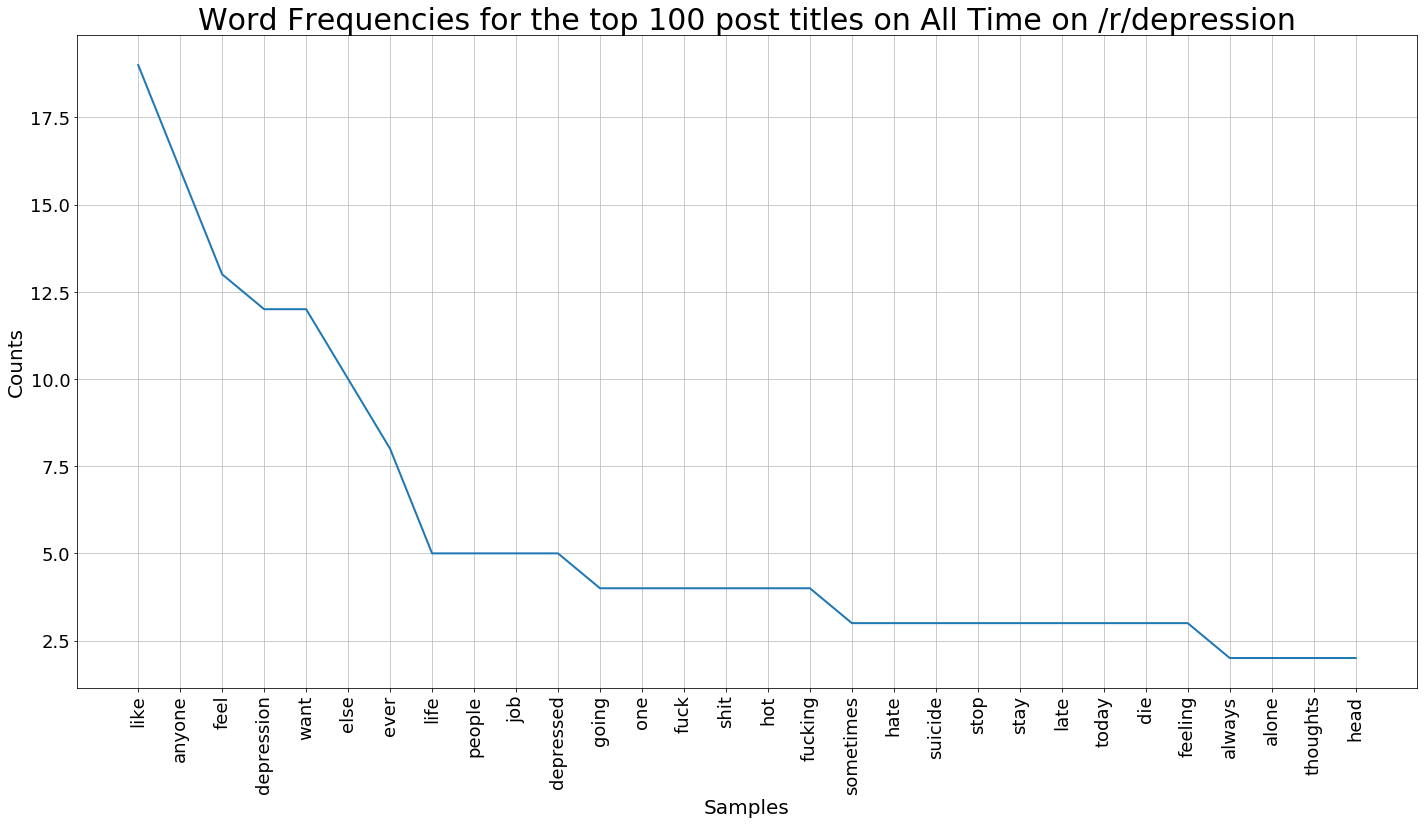

<Figure size 432x288 with 0 Axes>

In [74]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_all_time_titles)
fdist_all_time.most_common(2)
plt.title('Word Frequencies for the top 100 post titles on All Time on /r/depression', fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

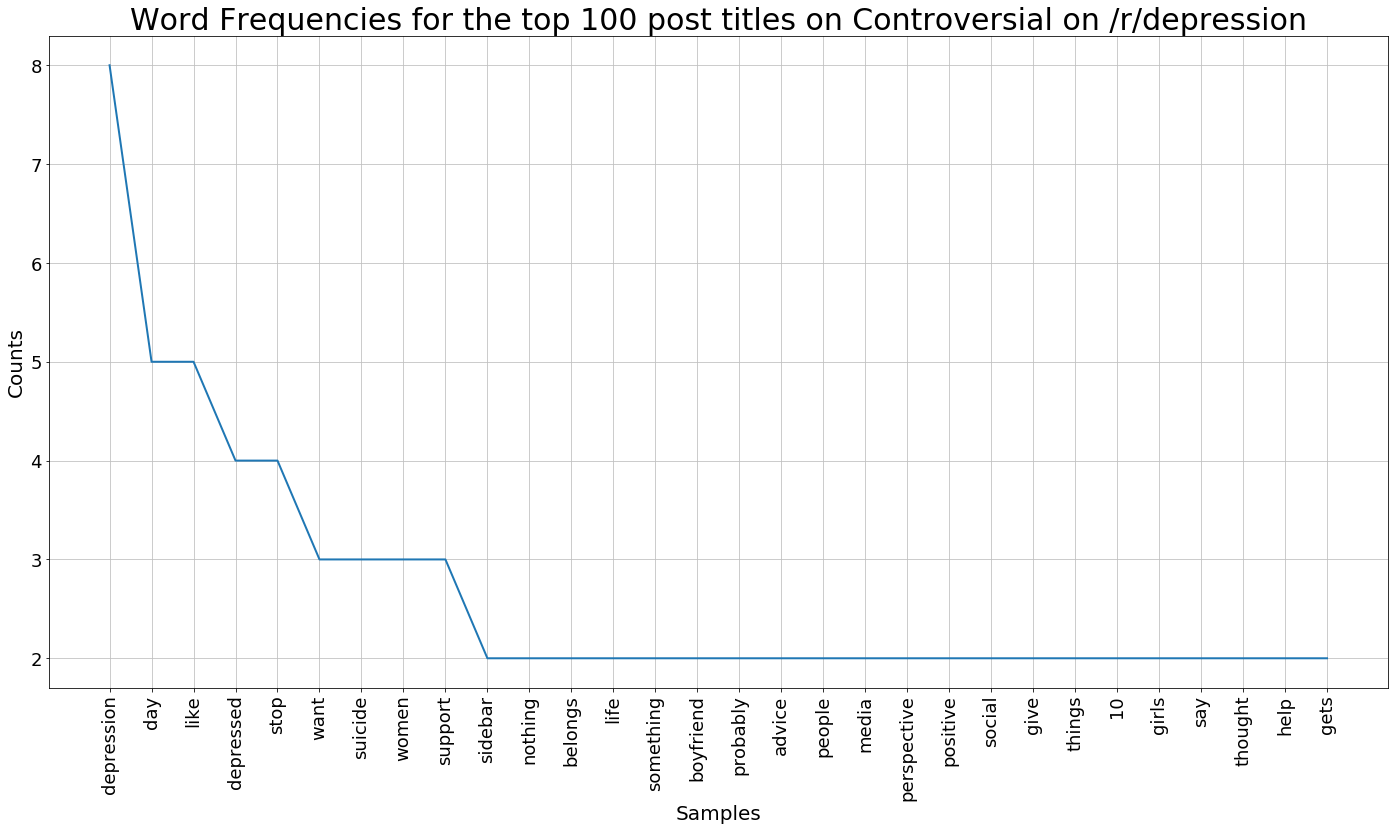

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize = (24, 12))
fdist_controversial = FreqDist(filtered_controversial_titles)
fdist_controversial.most_common(2)
plt.title('Word Frequencies for the top 100 post titles on Controversial on /r/depression', fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fig = fdist_controversial.plot(30,cumulative=False)
plt.savefig('WordFrequencyControversial.png')

# Web Scraping /r/depression's top 50 "All Time" and "Controversial" top comments

In [45]:
# list of IDs
all_time_id = []
controversial_id = []

# list of comments
all_time_top_comments = []
controversial_top_comments = []

# appends the titles of the first 50 all time and controversial posts to a list
for submission in subreddit.top(limit=50):
    all_time_id.append(submission.id)
            
for submission in subreddit.controversial(limit=50):
    controversial_id.append(submission.id)

In [46]:
# gets a list of top comments from the top 50 posts in all time
for i in all_time_id:
    submission = reddit.submission(id=i)
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        all_time_top_comments.append(top_level_comment.body)

In [47]:
# gets a list of top comments from the top 50 posts in controversial
for i in controversial_id:
    submission = reddit.submission(id=i)
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        controversial_top_comments.append(top_level_comment.body)

In [66]:
# converting to lowercase
all_time_top_comments = [k.lower() for k in all_time_top_comments]
controversial_top_comments = [k.lower() for k in controversial_top_comments]

# converting to dataframe so it is easier to tokenize
all_time_top_comments_df = pd.DataFrame(all_time_top_comments)
controversial_top_comments_df = pd.DataFrame(controversial_top_comments)

# Combining text into 1 string for tokenization
text_all_time_top_comments = ' '.join(all_time_top_comments_df[0])
text_controversial_top_comments = ' '.join(controversial_top_comments_df[0])

# Tokenizing each text to prep for a frequency distribution
tokenized_all_time_top_comments = word_tokenize(text_all_time_top_comments)
tokenized_controversial_top_comments = word_tokenize(text_controversial_top_comments)

# filtered text w/o unnecessary words
filtered_all_time_top_comments = []
filtered_controversial_top_comments = []

In [67]:
# Filtering out noise to gauge the trending topics better
for w in tokenized_all_time_top_comments:
    if w not in stop_words:
        filtered_all_time_top_comments.append(w)

for w in tokenized_controversial_top_comments:
    if w not in stop_words:
        filtered_controversial_top_comments.append(w)

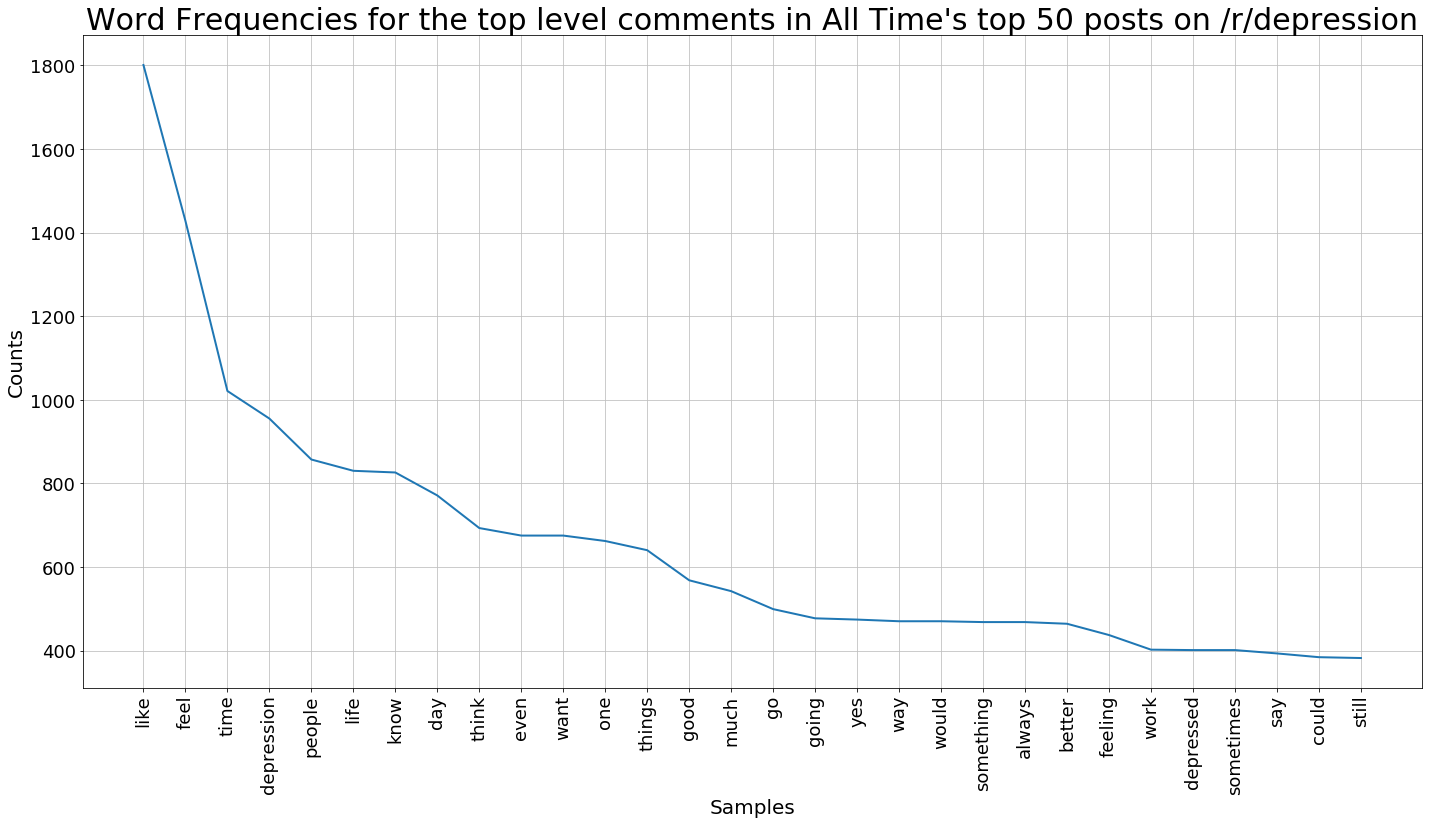

<Figure size 432x288 with 0 Axes>

In [68]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_all_time_top_comments)
fdist_all_time.most_common(2)
plt.title("Word Frequencies for the top level comments in All Time's top 50 posts on /r/depression", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

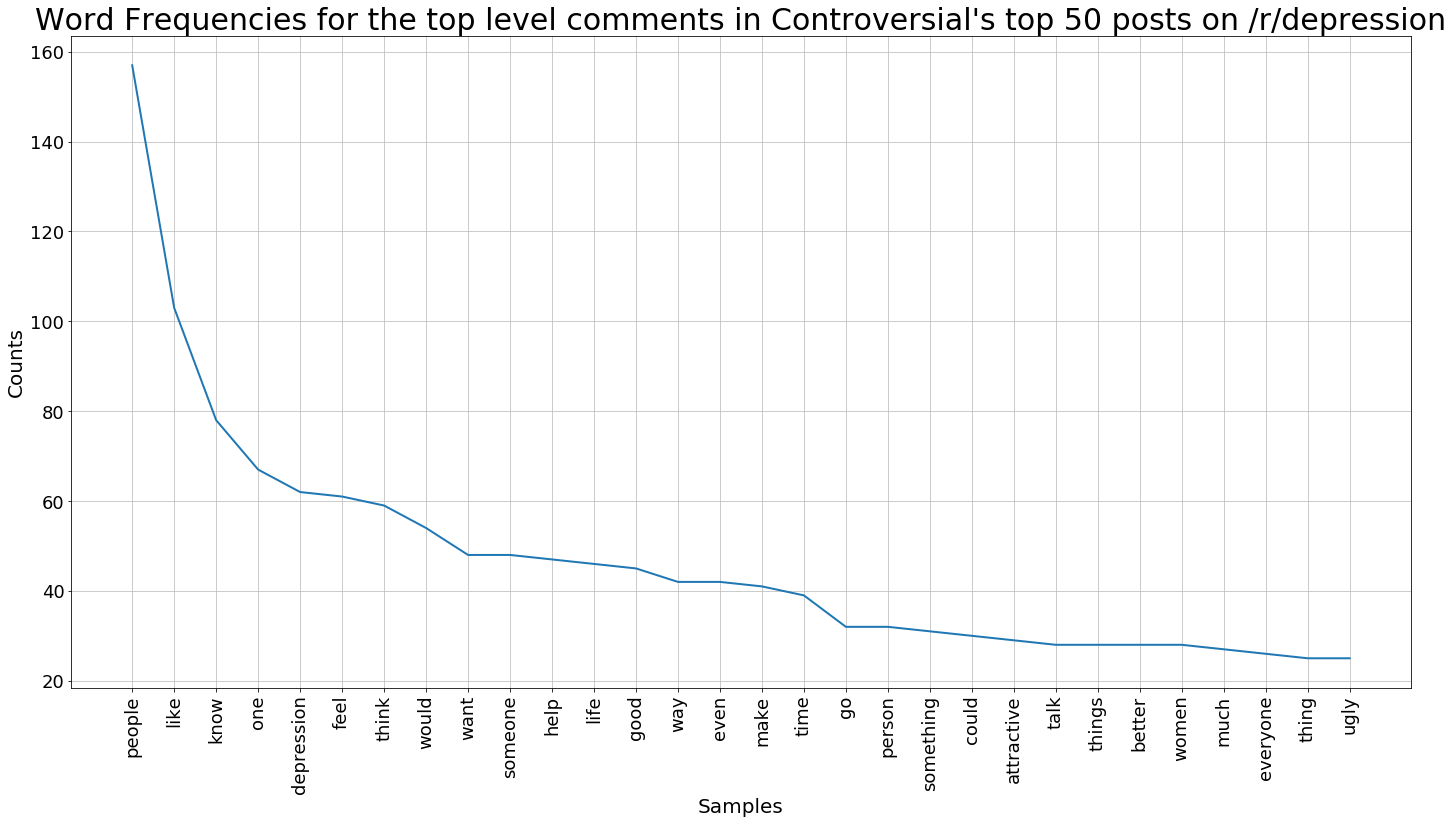

<Figure size 432x288 with 0 Axes>

In [82]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_controversial_top_comments)
fdist_all_time.most_common(2)

plt.title("Word Frequencies for the top level comments in Controversial's top 50 posts on /r/depression", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')